# Supply Chain Analytics In Python

A Supply Chain consists of all parties involved, directly or indirectly in fulfilling a customer's request. This includes the suppliers, internal manufacturing and third party suppliers. An example of a supply chain is given below.

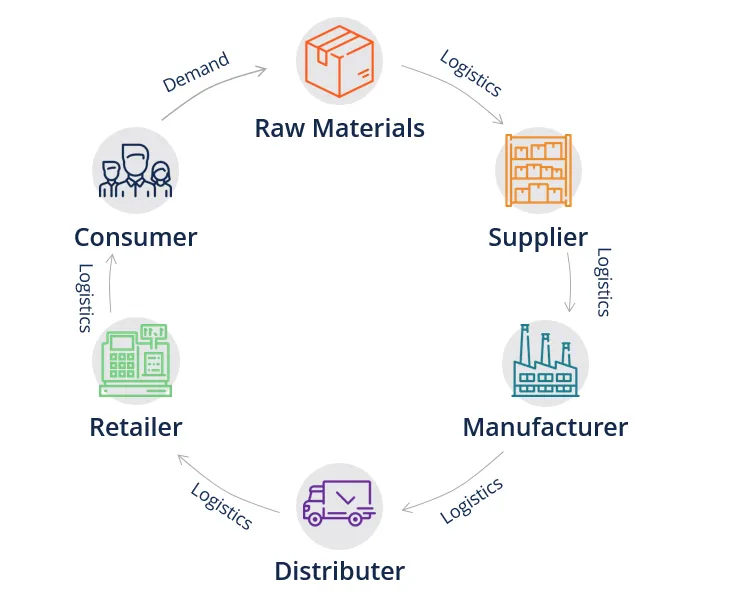

## Supply Chain Optimisation

Often in business we attempt to minimise costs and maximise profits. This task is often very complex as there are usually so many varying factors. Supply chain optimisation attempts to consider all the factors while also maximising profits or minimising costs. One tool which is often used is known as linear programming.

### -Linear Programming

Linear Programming is a modelling tool used for modelling decisions for optimisation. It uses a mathematical model whose requirements are represented by linear relationships. There are three main components in Linear Programming: **Decision Variables** which is what you can control, **Objective Function** which describes the goal as a mathematical expression and **Constraints** which are mathematical expressions that describe the limits of a solution. Let's take a look at an example where linear programming can be used to solve a supply chain problem.

Let's say we are a company that makes two types of chocolate bars. We only have 12 units of milk and 10 units of coco. How many of each bar should we make with the given stock if the company wishes to maximise profits? The info required to produce each bar is given below, also with the profit per unit of each bar:

| Bars | Milk | Coco | Profit Per Unit | 
| :--: | :--: | :--: | :--: | 
| A | 1 | 3 | 6 |
| B | 1 | 2 | 4 |

Let's start by defining our decision variables, objective function and our constraints.

**Decision Variables:** - What we can control: <br> • Total Number of units of A and B that we will produce. <br> <br>**Objective Function:** - Mathematical expression that uses variables to express goal: <br> • max(6x+4y) where x = number of units of A produced and y = number of units of B produced i.e. we want to maximise profits. <br> <br> **Constraints** - Mathematical expression that describes the limits of a solution. <br> • x+y$\leq$10 - each unit of A and B requires one unit of milk. The total amount of milk available is 10. <br> • 3x+2y$\leq$12 - each unit of A and B requires 3 units of milk and 2 units of coco.  The total amount of coco available is 12. <br> • x$\geq$0, y$\geq$0 - as the values of A and B can only be positive integers.

Now that we have the information we need we can solve this using PuLP, which is a modelling framework for Linear Programming problems written in python.

Let's firstly install pulp.

In [1]:
#Install pulp
! pip install pulp

To begin a model, we must initialize it. This is done by using pulps LpProblem function which is passed two variables. These two variables are the name, which refers to the name of the model and the sense, which refers to the Linear Programming problem objective. This is either LpMinimize if you're looking to minimize the objective function or LpMaximize if you're looking to maximize the objective function. An example is in the given code below.

In [2]:
#import pulp
from pulp import *
model = LpProblem(name='Maximize_Chocolate_Bar_Profits', sense=LpMaximize)

We then must define our decision variables by defining each of the variables individually using LpVariable. LpVariable has five arguments - name, which is the name of the variable used in the output, lowBound which is the lower bound on the variable's range, upBound which is the upper bound on the variable's range, cat which is the vategory of the variable i.e. integer, binary or continuous and e, which is used for column based modelling. For our example we have two decision variables - bar A and bar B. Note that lowBound=0 this means that the lowest amount you are able to produce of either A and B is zero and there is no upper bound, also cat='Integer' as for our example we can only sell whole bars.

In [3]:
#Two continuous decision variables with a lower bound of 0 and no upper bound - A and B
A = LpVariable('A', lowBound=0, upBound=None, cat='Integer')
B = LpVariable('B', lowBound=0, upBound=None, cat='Integer')

Now that we have defined our decision variables we must define our objective function. To do this we must ask ourselves what is the task we are trying to do? In our example we are trying to maximize profits. We know that we get 6 profit per unit A produced and 4 profit per unit B produced. therefore we are trying to maximise 6*A + 4*B. Let's add this to our model like so:

In [4]:
#Define objective function
model += 6*A + 4*B

Now that we have defined our objective function we should define our constraints. These are similar to our objective function in the fact that it will be represented by a similar mathematical expression. In our example our constraints are the coco and milk we have. We know that each unit of Bar A requires 1 milk and each unit of Bar B also requires 1 unit of milk. Therefore one of our constraints will be 1*A+1*B<=10. We repeat this step for our coco and get 3*A + 2*B <= 12. 

In [5]:
#Define constraints
model += A+B<=10
model += 3*A + 2*B <=12

Let's now combine all these steps into one code block with model.solve() and also get it to print how many units of each chocolate bar we should make and also the profit that it will yield us.

In [6]:
#Initialize the model
model = LpProblem(name='Maximise_Chocolate_bars_profits1',sense=LpMaximize)

#Define decision variables
A = LpVariable('A',lowBound=0,upBound=None,cat='Integer')
B = LpVariable('B',lowBound=0,upBound=None,cat='Integer')

#Define objective function
model += 6*A + 4*B

#Define constraints
model += A+B<=10
model += 3*A + 2*B <=12

model.solve()
print("Produce {} units of chocolate bar A".format(A.varValue))
print("Produce {} units of chocolate bar B".format(B.varValue))
print("Total Profit: {} " .format(6*A.varValue+4*B.varValue))

Produce 4.0 units of chocolate bar A
Produce 0.0 units of chocolate bar B
Total Profit: 24.0 


As we can see the company should produce 4 units of bar A and no units of bar B with the total amount of coco and milk that they have. As we don't quite know what is happening under the hood the question arises - how can we know that we have found an optimal solution? Well, Pulp has a status method which tells us one of five things regarding the model. Either it is 'Not Solved' which means that it has not solved the problem, 'Optimal' which means that an optimal solution has been found, 'Infeasible' which means there are no feasible solutions, 'Unbounded' which means that the object function is not bounded i.e. maximizing or minimizing the objective will tend towards infinity or finally 'Undefined' which means that the optimal solution may exist but may not have been found. Let's check with our solution to see if we have found an optimal solution.

In [7]:
#Initialize the model
model = LpProblem(name='Maximise_Chocolate_bars_profits2',sense=LpMaximize)

#Define decision variables
A = LpVariable('A',lowBound=0,upBound=None,cat='Integer')
B = LpVariable('B',lowBound=0,upBound=None,cat='Integer')

#Define objective function
model += 6*A + 4*B

#Define constraints
model += A+B<=10
model += 3*A + 2*B <=12

model.solve()
print("Produce {} units of chocolate bar A".format(A.varValue))
print("Produce {} units of chocolate bar B".format(B.varValue))
print("Status", LpStatus[model.status])

Produce 4.0 units of chocolate bar A
Produce 0.0 units of chocolate bar B
Status Optimal


As we can see from above an optimal solution has been found which was what we were looking for but what if we made an error in our code along the way? If this were the case the model may be classified as 'optimal' but due to the error in code it may be completely wrong. A solution to this is to perform somewhat of a sanity check. Firstly, we should take a look at the values of the objective function. Based off the problem and the data, are these values within an expected range? If so, great. If not, there may be a problem with the code or the data. Let's have a look at the values of the decision variables and the objective function.

In [8]:
#Initialize the model
model = LpProblem(name='Maximise_Chocolate_bars_profits3',sense=LpMaximize)

#Define decision variables
A = LpVariable('A',lowBound=0,upBound=None,cat='Integer')
B = LpVariable('B',lowBound=0,upBound=None,cat='Integer')

#Define objective function
model += 6*A + 4*B

#Define constraints
model += A+B<=10
model += 3*A + 2*B <=12

model.solve()
print('Objective = ', value(model.objective))

Objective =  24.0


As we can see the value for our objective function is 24, which in our case is the profit given by the optimal quantity of bar A and bar B to produce. This is in the range I would expect so we can assume that our model is working correctly. 

# Dealing with Multiple Decision Variables

In our last example we dealt with a company that only had two chocolate bars but this isn't very realistic. In most cases companies will usually have hundreds or even thousands of products and when this is the case it is too time consuming and inefficient to type out the objective function each time. Let's now take a look at the same company but this time let's say that the company makes 10 bars(A,B,C,D,E,F,G,H,I,J). The company has 120 milk and 100 coco. How many of each bar should be made if the company wishes to maximise profits and also make atleast one of each bar? The info required to produce each bar is given below, along with the profit per unit:

| Bar | Milk | Coco | Profit Per Unit |
| :--: | :--: | :--: | :--: | 
| A | 1 | 3 | 4 |
| B | 2 | 4 | 5 |
| C | 1 | 2 | 3 |
| D | 3 | 4 | 6 |
| E | 2 | 3 | 4 |
| F | 3 | 1 | 4 |
| G | 2 | 1 | 3 |
| H | 4 | 2 | 5 |
| I | 5 | 3 | 6 |
| J | 2 | 4 | 4 |

In [9]:
model = LpProblem(name='Maximise_Chocolate_bars_profits4',sense=LpMaximize)

#Define decision variables
A = LpVariable('A',lowBound=1,upBound=None,cat='Integer')
B = LpVariable('B',lowBound=1,upBound=None,cat='Integer')
C = LpVariable('C',lowBound=1,upBound=None,cat='Integer')
D = LpVariable('D',lowBound=1,upBound=None,cat='Integer')
E = LpVariable('E',lowBound=1,upBound=None,cat='Integer')
F = LpVariable('F',lowBound=1,upBound=None,cat='Integer')
G = LpVariable('G',lowBound=1,upBound=None,cat='Integer')
H = LpVariable('H',lowBound=1,upBound=None,cat='Integer')
I = LpVariable('I',lowBound=1,upBound=None,cat='Integer')
J = LpVariable('J',lowBound=1,upBound=None,cat='Integer')

#Define objective function
profit_list = [4*A, 5*B, 3*C, 6*D, 4*E, 4*F, 3*G, 5*H, 6*I, 4*J]
model += lpSum(profit_list)

#Define constraints
milk_list = [1*A, 2*B, 1*C, 3*D, 2*E, 3*F, 2*G, 4*H, 5*I, 2*J]
model += lpSum(milk_list) <= 120
coco_list = [3*A, 4*B, 2*C, 4*D, 3*E, 1*F, 1*G, 2*H, 3*I, 4*J]
model += lpSum(coco_list) <=100

model.solve()
for bar in [A,B,C,D,E,F,G,H,I,J]:
    print("Produce {} units of chocolate bar ".format(bar.varValue) +str(bar))
print("Status", LpStatus[model.status])

Produce 16.0 units of chocolate bar A
Produce 1.0 units of chocolate bar B
Produce 1.0 units of chocolate bar C
Produce 1.0 units of chocolate bar D
Produce 1.0 units of chocolate bar E
Produce 25.0 units of chocolate bar F
Produce 5.0 units of chocolate bar G
Produce 1.0 units of chocolate bar H
Produce 1.0 units of chocolate bar I
Produce 1.0 units of chocolate bar J
Status Optimal


As we had to define these lists individually it did not save us much time in our example, but these models are run on large datasets where these lists are often predefined during the data processing stage. Because of this it is important to know how to create these models by utilising both dictionaries and lists. Let's extend the example above but this time let's make use of dictionaries and lists in order to create our model. For the sake of our example let's pretend that our lists and dictionaries are predefined from a dataset. 

In [10]:
model = LpProblem(name='Maximise_Chocolate_bars_profits5',sense=LpMaximize)

#Define decision variables
A = LpVariable('A',lowBound=1,upBound=None,cat='Integer')
B = LpVariable('B',lowBound=1,upBound=None,cat='Integer')
C = LpVariable('C',lowBound=1,upBound=None,cat='Integer')
D = LpVariable('D',lowBound=1,upBound=None,cat='Integer')
E = LpVariable('E',lowBound=1,upBound=None,cat='Integer')
F = LpVariable('F',lowBound=1,upBound=None,cat='Integer')
G = LpVariable('G',lowBound=1,upBound=None,cat='Integer')
H = LpVariable('H',lowBound=1,upBound=None,cat='Integer')
I = LpVariable('I',lowBound=1,upBound=None,cat='Integer')
J = LpVariable('J',lowBound=1,upBound=None,cat='Integer')

#Define objective function
bar_types = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
profit_per_bar = {'A':4, 'B':5, 'C':3, 'D':6, 'E':4, 'F':4, 'G':3, 'H':5, 'I':6,'J':4}
var_dict = {'A':A,'B':B,'C':C,'D':D,'E':E,'F':F,'G':G,'H':H,'I':I,'J':J}
model += lpSum([profit_per_bar[type] * var_dict[type] for type in bar_types])

#Define constraints
milk_per_bar = {'A':1,'B':2,'C':1,'D':3,'E':2,'F':3,'G':2,'H':4,'I':5,'J':2}
coco_per_bar = {'A':3,'B':4,'C':2,'D':4,'E':3,'F':1,'G':1,'H':2,'I':3,'J':4}
model += lpSum([milk_per_bar[type] * var_dict[type] for type in bar_types]) <=120
model += lpSum([coco_per_bar[type] * var_dict[type] for type in bar_types]) <=100

model.solve()
for bar in var_dict.values():
    print("Produce {} units of chocolate bar ".format(bar.varValue) +str(bar))
print("Status", LpStatus[model.status])

Produce 16.0 units of chocolate bar A
Produce 1.0 units of chocolate bar B
Produce 1.0 units of chocolate bar C
Produce 1.0 units of chocolate bar D
Produce 1.0 units of chocolate bar E
Produce 25.0 units of chocolate bar F
Produce 5.0 units of chocolate bar G
Produce 1.0 units of chocolate bar H
Produce 1.0 units of chocolate bar I
Produce 1.0 units of chocolate bar J
Status Optimal


As we can see utlising dictionaries and lists enables the developer to spend less time typing out lists and more time working on the model itself. If we look above we can see how defining each decision variable individually can be quite tedious and once again when there are hundreds or thousands of these then it becomes far too time consuming to type them all out individually. LpVariable.dicts can define multiple variables for us in a few blocks of code. Let's have a quick look how it works below.

In [11]:
#Define decision variables
bars=['A','B','C','D','E','F','G','H','I','J']
LpVariable.dicts('Bar', bars, lowBound=1, upBound=None, cat='Integer')

{'A': Bar_A,
 'B': Bar_B,
 'C': Bar_C,
 'D': Bar_D,
 'E': Bar_E,
 'F': Bar_F,
 'G': Bar_G,
 'H': Bar_H,
 'I': Bar_I,
 'J': Bar_J}

As we can see this has created a dictionary for us which saves us the need to define each decision variable individually. Notice that the LpVariable.dicts function took five arguments - the first being the name which refers to the prefix to the name of each lp variable created, the second being the index which takes a list of strings and sets them as the keys to the dictionary of Lp Variables, an upper and lower bound for each of these decision variables and also the cat which refers to the type of variable it is. In Supply Chain Linear Programming problems we often have to find a decision variable for every combination of events, using LpVariables.dicts in combination with pythons list comprehension we can compactly create those combination of decision variables. Let's take a look at an example of this. For our example let's say we have two bars - A and B and two variants of each A and B, that is A with nuts, A without nuts, B with nuts and B without nuts. Let's see how we could define the decision variables in this case.

In [12]:
nuts_or_not = [ 'Nuts', 'No Nuts']
bar = ['A', 'B']
LpVariable.dicts('Bar', [(n,b) for n in nuts_or_not for b in bar], lowBound=1, upBound=None, cat='Integer')

{('Nuts', 'A'): Bar_('Nuts',_'A'),
 ('Nuts', 'B'): Bar_('Nuts',_'B'),
 ('No Nuts', 'A'): Bar_('No_Nuts',_'A'),
 ('No Nuts', 'B'): Bar_('No_Nuts',_'B')}

This acted as expected and gave us a dictionary with each bar seperated into with nuts and without nuts. Let's take a look at how we can use LpVariable.dicts in our previous example.

In [13]:
model = LpProblem(name='Maximise_Chocolate_bars_profits6', sense=LpMaximize)

#Define decision variables
bar_types=['A','B','C','D','E','F','G','H','I','J']
x = LpVariable.dicts('Bar',bar_types, lowBound=1, cat='Integer')

#Define objective function
profit_per_bar = {'A':4, 'B':5, 'C':3, 'D':6, 'E':4, 'F':4, 'G':3, 'H':5, 'I':6,'J':4}         
model += lpSum([profit_per_bar[type] * x[type] for type in bar_types])


#Define constraints
milk_per_bar = {'A':1,'B':2,'C':1,'D':3,'E':2,'F':3,'G':2,'H':4,'I':5,'J':2}
coco_per_bar = {'A':3,'B':4,'C':2,'D':4,'E':3,'F':1,'G':1,'H':2,'I':3,'J':4}
model += lpSum([milk_per_bar[type] * x[type] for type in bar_types]) <=120
model += lpSum([coco_per_bar[type] * x[type] for type in bar_types]) <=100

model.solve()
for bar in x.values():
    print("Produce {} units of chocolate bar ".format(bar.varValue) +str(bar))
print("Status", LpStatus[model.status])

Produce 16.0 units of chocolate bar Bar_A
Produce 1.0 units of chocolate bar Bar_B
Produce 1.0 units of chocolate bar Bar_C
Produce 1.0 units of chocolate bar Bar_D
Produce 1.0 units of chocolate bar Bar_E
Produce 25.0 units of chocolate bar Bar_F
Produce 5.0 units of chocolate bar Bar_G
Produce 1.0 units of chocolate bar Bar_H
Produce 1.0 units of chocolate bar Bar_I
Produce 1.0 units of chocolate bar Bar_J
Status Optimal


# Complex Example

Now that we know how to create a linear programming model for a simple problem, let's apply what we have learnt to a more complex model. A company wishes to set up its supply chain network in order to meet its regional demand. There are two options, either set up small manufacturing facilities within the region or else have a few large manufacturing plants and ship the product to each region. Each of these have advantages and disadvantages. The company would like you to create a model which finds a balance between these two options with the model focusing on meeting demand by determining the lowest cost regions to produce and ship product. You are given the demand, manufacturing capacity for each region, and the variable and fixed costs. Each of these have been given to you as a dataframe. You are told that the total production shipped to a particular region should equal the total demand of that region. Note: the variable costs show the costs of producing in location i and shipping to location j. 

Let's firstly create the dataframes, for the sake of the example let's pretend we are given this info by the company.

In [110]:
#create dataframes
capacity_data={'Low_Cap':[500,500,500,500,500], 'High_Cap':[1500,1500,1500,1500,1500]}
capacity_df = pd.DataFrame(capacity_data, index=['USA','Germany','Japan','Brazil','India'])

varcost_data={'USA':[7,14,23,17,15],'Germany':[12,5,13,21,16],'Japan':[17,17,4,27,24],
              'Brazil':[25,19,19,5,26],'India':[11,23,24,19,9]}
varcost_df = pd.DataFrame(varcost_data, index=['USA','Germany','Japan','Brazil','India'])

fixcost_data={'Low_Cap':[7000,5500,6000,2520,2100],'High_Cap':[10000,8000,8750,5000,4070]}
fixcost_df = pd.DataFrame(fixcost_data, index=['USA','Germany','Japan','Brazil','India'])

demand_data={'Demand':[3100.1,231.6,2004,461.7,912.4]}
demand_df = pd.DataFrame(demand_data, index=['USA','Germany','Japan','Brazil','India'])

Let's quickly take a lot at the data to get a better idea of what we are dealing with.

In [111]:
#print each dataset
from IPython.display import display
display(demand_df)
display(varcost_df)
display(fixcost_df)
display(capacity_df)

,Demand
USA,3100.1
Germany,231.6
Japan,2004.0
Brazil,461.7
India,912.4


,USA,Germany,Japan,Brazil,India
USA,7,12,17,25,11
Germany,14,5,17,19,23
Japan,23,13,4,19,24
Brazil,17,21,27,5,19
India,15,16,24,26,9


,Low_Cap,High_Cap
USA,7000,10000
Germany,5500,8000
Japan,6000,8750
Brazil,2520,5000
India,2100,4070


,Low_Cap,High_Cap
USA,500,1500
Germany,500,1500
Japan,500,1500
Brazil,500,1500
India,500,1500


Now that we have seen the data, let's define our decision variables, objective function and constraints.

**Decision Variables:** - What we can control: <br> • x<sub>ij</sub> = quantity produced at location i and shipped to j. <br> •y<sub>is</sub> = 1 if the plant at location i of capacity s is open, 0 if closed. <br> <br>**Objective Function:** - Mathematical expression that uses variables to express goal: <br> • min($\sum_{i=1}^{n}$(f<sub>is</sub>y<sub>is</sub>)+$\sum_{i=1}^{m}$$\sum_{i=1}^{n}$(c<sub>ij</sub>x<sub>ij</sub>)) - wish to minimize costs for each region. <br> •c<sub>ij</sub> = cost of producing and shipping from plant i to region j. <br>•f<sub>is</sub> = fixed cost of keeping plant i of capacity s open. <br> •n = number of production facilities. <br>•m = number of markets or regional demand points<br> <br> **Constraints** - Mathematical expression that describes the limits of a solution. <br> • $\sum_{i=1}^{n}$x<sub>ij</sub> = $D_j$ for j = 1,...,m - we need the total production shipped to a particular region to equal the demand for that region. <br> •n = number of production facilities. <br>•m = number of markets or regional demand points<br>•$\sum_{j=1}^{m}$x<sub>ij</sub> $\leq$ $\sum_{s=1}^{}$(k<sub>is</sub>y<sub>is</sub>) -we must make sure the total production of a region doesn't exceed that regions capacity. <br>•k<sub>is</sub> = production capacity of plant i of size s

Let's start by initialising our model.

In [16]:
model = LpProblem(name='Regional_Supply', sense = LpMinimize)

Now that we have initialised our model, we must define our decision variables. As we have both x<sub>ij</sub> and y<sub>is</sub> we must define two different dictionaries. We need our first dictionary to create a pair between each region i.e so every region ships to every other region. Our next dictionary should be able to specify which plant we are dealing with i.e. it could be USA Low_Cap or Germany High_Cap. We need to define two lists - the supply region and whether it is a low capacity or high capacity facility. 

In [17]:
loc=['USA', 'Germany', 'Japan', 'Brazil', 'India']
size = ['Low_Cap', 'High_Cap']
x = LpVariable.dicts('production',[(i,j) for i in loc for j in loc], lowBound=0, upBound=None, cat='Continous')
x

{('USA', 'USA'): production_('USA',_'USA'),
 ('USA', 'Germany'): production_('USA',_'Germany'),
 ('USA', 'Japan'): production_('USA',_'Japan'),
 ('USA', 'Brazil'): production_('USA',_'Brazil'),
 ('USA', 'India'): production_('USA',_'India'),
 ('Germany', 'USA'): production_('Germany',_'USA'),
 ('Germany', 'Germany'): production_('Germany',_'Germany'),
 ('Germany', 'Japan'): production_('Germany',_'Japan'),
 ('Germany', 'Brazil'): production_('Germany',_'Brazil'),
 ('Germany', 'India'): production_('Germany',_'India'),
 ('Japan', 'USA'): production_('Japan',_'USA'),
 ('Japan', 'Germany'): production_('Japan',_'Germany'),
 ('Japan', 'Japan'): production_('Japan',_'Japan'),
 ('Japan', 'Brazil'): production_('Japan',_'Brazil'),
 ('Japan', 'India'): production_('Japan',_'India'),
 ('Brazil', 'USA'): production_('Brazil',_'USA'),
 ('Brazil', 'Germany'): production_('Brazil',_'Germany'),
 ('Brazil', 'Japan'): production_('Brazil',_'Japan'),
 ('Brazil', 'Brazil'): production_('Brazil',_'Brazil

In [18]:
y = LpVariable.dicts('plant', [(i,s) for s in size for i in loc], cat='Binary')
y

{('USA', 'Low_Cap'): plant_('USA',_'Low_Cap'),
 ('Germany', 'Low_Cap'): plant_('Germany',_'Low_Cap'),
 ('Japan', 'Low_Cap'): plant_('Japan',_'Low_Cap'),
 ('Brazil', 'Low_Cap'): plant_('Brazil',_'Low_Cap'),
 ('India', 'Low_Cap'): plant_('India',_'Low_Cap'),
 ('USA', 'High_Cap'): plant_('USA',_'High_Cap'),
 ('Germany', 'High_Cap'): plant_('Germany',_'High_Cap'),
 ('Japan', 'High_Cap'): plant_('Japan',_'High_Cap'),
 ('Brazil', 'High_Cap'): plant_('Brazil',_'High_Cap'),
 ('India', 'High_Cap'): plant_('India',_'High_Cap')}

As we can see using some of the same techniques we used for our previous examples also work well for this example. Now that we have our decision variables let's define our objective function. Let's split it into two parts. Let's firstly write the code for: $\sum_{i=1}^{n}$(f<sub>is</sub>y<sub>is</sub>)

In [119]:
objective_1 = lpSum([fixcost_df.loc[i,s] * y[(i,s)] for s in size for i in loc])

Now that we have defined the first half of the objective function, let's now write the code for $\sum_{i=1}^{m}$$\sum_{i=1}^{n}$(c<sub>ij</sub>x<sub>ij</sub>)

In [120]:
objective_2 = lpSum([varcost_df.loc[i,j] * x[(i,j)] for i in loc for j in loc])

Let's now combine these as our final objective function.

In [21]:
model += objective_1 + objective_2

Let's now define our constraints. Let's firstly define the constraint that for quantity produced at i and shipped to j is equal to the demand at location j.

In [115]:
for j in loc:
    model += lpSum([x[(i,j)] for i in loc]) == demand_df.loc[j,'Demand']

Now that we have defined our first constraint, let's define our final constraint and ensure that the total production of a region does not exceed its capacity.

In [117]:
for i in loc:
    model += lpSum([x[(i,j)] for j in loc]) <= lpSum([capacity_df.loc[i,s] * y[(i,s)] for s in size])

make sure the total production of a  region does not exceed its production capacity point. we want to make sure the total production of a region does not exceed its capacity. Let's now combine these into one code block and solve it.

In [123]:
#Initialize model
model = LpProblem(name='Regional_Supply', sense = LpMinimize)

#Define decision variables
loc=['USA', 'Germany', 'Japan', 'Brazil', 'India']
size = ['Low_Cap', 'High_Cap']
x = LpVariable.dicts('production',[(i,j) for i in loc for j in loc], lowBound=0, upBound=None, cat='Continous')
y = LpVariable.dicts('plant', [(i,s) for s in size for i in loc], cat='Binary')

#Define objective function
objective_1 = lpSum([fixcost_df.loc[i,s] * y[(i,s)] for s in size for i in loc])
objective_2 = lpSum([varcost_df.loc[i,j] * x[(i,j)] for i in loc for j in loc])
model += objective_1 + objective_2

#Define the constraints
for j in loc:
    model += lpSum([x[(i,j)] for i in loc]) == demand_df.loc[j,'Demand']
for i in loc:
    model += lpSum([x[(i,j)] for j in loc]) <= lpSum([capacity_df.loc[i,s] * y[(i,s)] for s in size])

#Solve the model
model.solve()
print(LpStatus[model.status])

Optimal


As we can see our model is optimal i.e. it has found an optimal solution but before we get our answer we should ask ourselves what should we expect for the values for our decision variables? Remember in this case our decision variables are the quantity produced at a specific location and shipped to another location and whether a specific plant is open or closed. We would expect high production in the regions which have low production and shipping costs. We would also expect that production would be close to max capacity for regions with relatively low fixed and variable costs.  We would also expect that high capacity plants would be open for regions with high demand and for high capacity production plants to be open in regions with relatively low costs. Now that we have an expected range let's take a look at our decision variables and objective value given in a dataframe.

Before we do this let's discuss slack and shadow price. Shadow price is defined as the change in optimal value of the objective function per unit increase in the right-hand-side for a constraint, given everything else remains unchanged. Shadow prices give an idea whether or not changing an input will change the solution. This idea is confusing at first but It will be easier to understand once explained with an example. This also leads on to the idea of slack. Slack is defined as the amount of a resource that is unused. If the slack=0 then it is considered a binding constraint. That is any change in this constraint will change the solution. Let's take a look at the slack, shadow prices, decision variables and objective function for our model.

In [127]:
# Print the Production Quantities
o = [{'prod':'{} to {}'.format(i,j), 'quantity':x[(i,j)].varValue} 
     for i in loc for j in loc]
print(pd.DataFrame(o))

# Print the Plant Values of the different regions
o = [{'lowCap':y[(i,size[0])].varValue, 'highCap':y[(i,size[1])].varValue}
     for i in loc]
print(pd.DataFrame(o, index=loc))

# Print the Objective Value
print('Objective = ', value(model.objective))

#print shadow price and slack
o = [{'name':name, 'shadow price':c.pi, 'slack':c.slack} for name,c in model.constraints.items()]
print(pd.DataFrame(o))

                  prod  quantity
0           USA to USA    1500.0
1       USA to Germany       0.0
2         USA to Japan       0.0
3        USA to Brazil       0.0
4         USA to India       0.0
5       Germany to USA    1264.4
6   Germany to Germany     231.6
7     Germany to Japan       4.0
8    Germany to Brazil       0.0
9     Germany to India       0.0
10        Japan to USA       0.0
11    Japan to Germany       0.0
12      Japan to Japan    2000.0
13     Japan to Brazil       0.0
14      Japan to India       0.0
15       Brazil to USA       0.0
16   Brazil to Germany       0.0
17     Brazil to Japan       0.0
18    Brazil to Brazil     461.7
19     Brazil to India       0.0
20        India to USA     335.7
21    India to Germany       0.0
22      India to Japan       0.0
23     India to Brazil       0.0
24      India to India     912.4
         lowCap  highCap
USA         0.0      1.0
Germany     0.0      1.0
Japan       1.0      1.0
Brazil      1.0      0.0
India       0.0  

As we can see we should open high capacity plants in USA, Germany,Japan and India. This makes sense as the USA, India and Japan have high demand while Germany has relatively low fixed costs. Additionally the High capacity USA facility and Japanese facility cannot produce enough to cover its own demand and therefore it must import. They will import from Germany as shipping costs are the lowest. Also, the lowest cost of delivering all these products and producing them to meet this given demand is 92,323. One thing to note in the shadow price and slack dataframe is that the first variable under name is the demand for USA, the second is the demand for Germany and so on for all 5 of the regions. The next five are then the supply of each regions. Let's take for example '_C8' this means that increasing the production capacity of Japan by one unit will decrease the overall cost by 14. One last example would be for '_C1' this would mean that if the demand were to increase by one unit then the overall cost would increase by 15. Note: the slack for both of these are 0, which means they are binding constraints. You will notice if the slack is >0 then the shadow price =0 i.e. it does not cause any change. Therefore we have solved the problem. We have worked out the cheapest production cost at meeting the given demand in various regions given that nothing is wasted, we have worked out where plants should be located and which type of plants should be opened. We have also worked out the shadow price and slack which gives the company an outlook on possibly where it should focus advertising or perhaps where it should increase production.